In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

### Задание 1

Попробуем определить тип популяции опоссумов по их размерам.

Для выполнения задания:

Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор

Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)

Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)

Постройте модель LDA

Рассчитайте точность вашей модели на тестовой выборке

In [3]:
possum = pd.read_csv('possum.csv')
possum.head(3)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


In [6]:
possum_1 = possum[['Pop', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [13]:
possum_1.describe()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [14]:
possum_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    object 
 1   hdlngth   104 non-null    float64
 2   skullw    104 non-null    float64
 3   totlngth  104 non-null    float64
 4   taill     104 non-null    float64
 5   footlgth  103 non-null    float64
 6   earconch  104 non-null    float64
 7   eye       104 non-null    float64
 8   chest     104 non-null    float64
 9   belly     104 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.3+ KB


In [16]:
possum_1.Pop.unique()

array(['Vic', 'other'], dtype=object)

Null значений нет (есть только 1 в footlgth), размерность данных не имеет значительных отличий - стандартизация не нужна, в результирующих данных 2 класса.

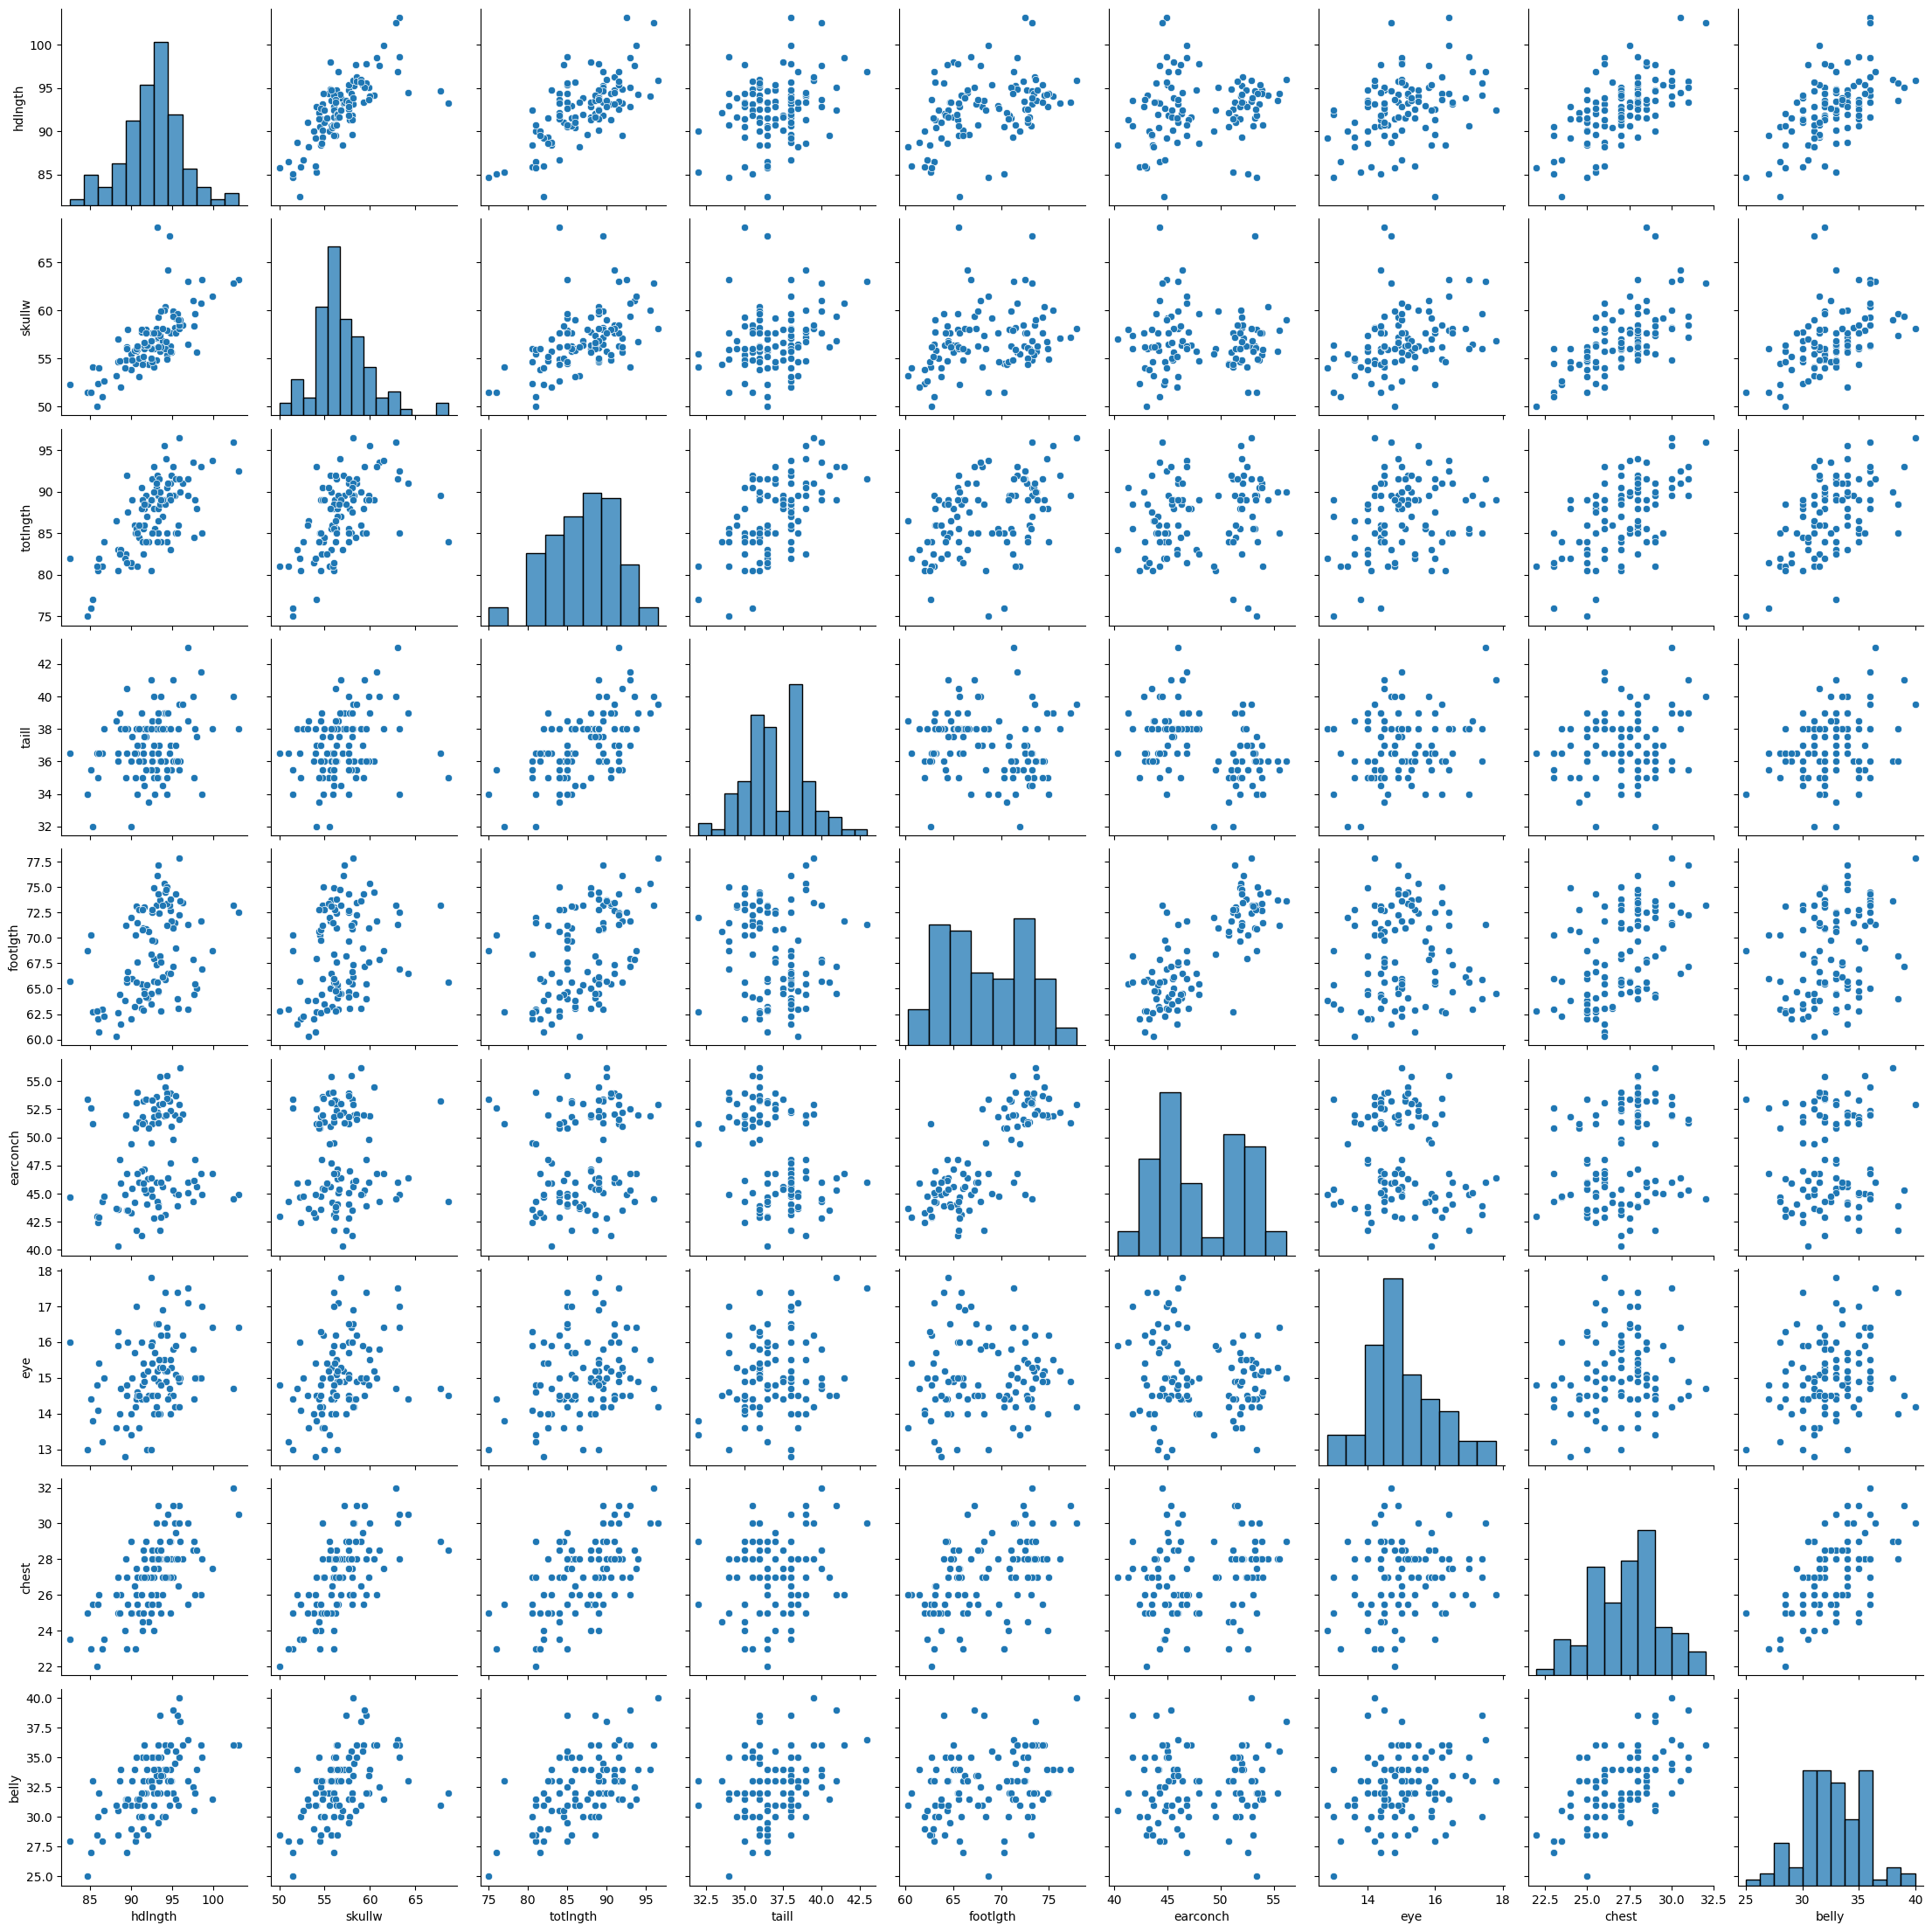

In [8]:
sns.pairplot(possum_1)

<Axes: >

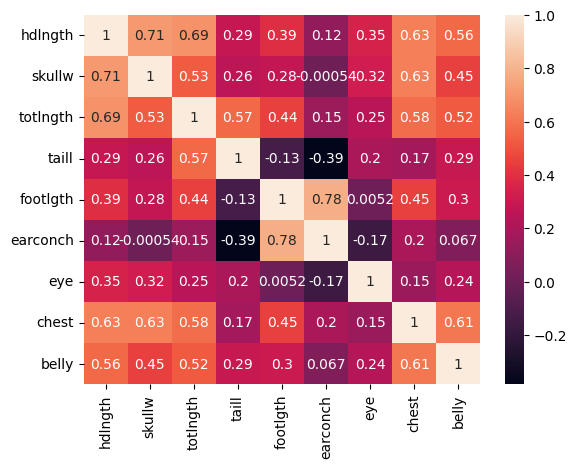

In [10]:
sns.heatmap(possum_1[['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].corr(), annot=True)

В силу того, что между рядом атрибутов существует довольно выраженная корреляция, для построения модели классификации стоит взять только наименее связанные.
Я выделила 3: totlngth, eye, earconch

In [24]:
data = possum_1[['totlngth', 'eye', 'earconch']]

In [25]:
le = LabelEncoder()
le.fit(possum_1['Pop'])

data_class = le.transform(possum_1['Pop'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2, random_state=42)

In [29]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
lda.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [31]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [32]:
result

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [34]:
accuracy_score(y_test, lda.predict(X_test))

1.0

Идеальная модель))) 100%

In [43]:
precision_score(y_test, lda.predict(X_test))

1.0

In [44]:
recall_score(y_test, lda.predict(X_test))

1.0

In [46]:
f1_score(y_test, lda.predict(X_test))

1.0

In [35]:
lda.coef_

array([[ 0.18151457, -0.13904918, -1.89085814]])

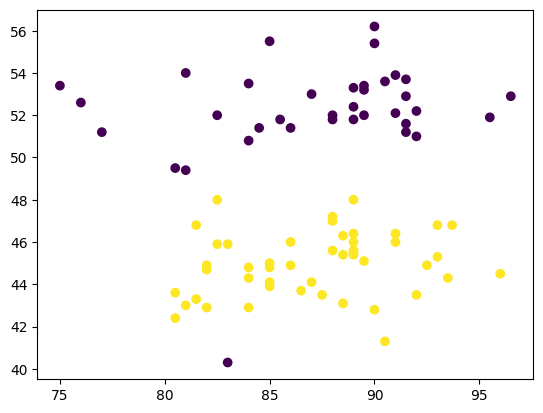

In [38]:
plt.scatter(x=X_train['totlngth'], y=X_train['earconch'], c=y_train)
plt.show()

### Задание 2
Теперь кластеризируем страны на основании показателей импорта и экспорта.

Для выполнения задания:

Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.

Подберите оптимальное число кластеров для алгоритма K-means.

Визуализируйте полученную кластеризацию.

Проверьте правильность выбора кластеров с помощью метода локтя.

Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.

Визуализируйте результат.

Желательно, но не обязательно:

Попробуйте провести кластеризацию с помощью других столбцов в наборе, оцените результаты.

In [48]:
countries = pd.read_csv('Country-data.csv')
countries.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [51]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [52]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [55]:
imp_exp = countries[['exports', 'imports']]

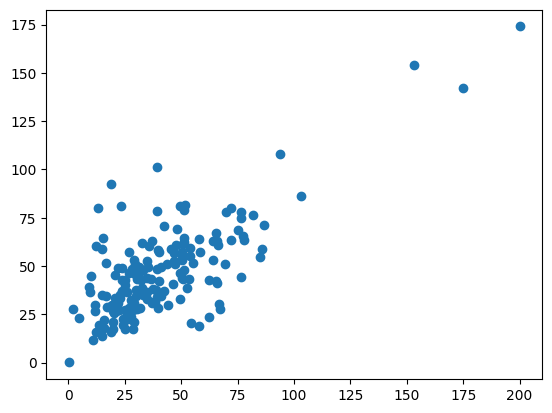

In [57]:
plt.scatter(x=imp_exp['exports'], y=imp_exp['imports'])
plt.show()

Весьма позновательно, наблюдается корреляция между показателями....

In [60]:
scaler = StandardScaler()

In [76]:
imp_exp_t = scaler.fit_transform(imp_exp)

In [85]:
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(imp_exp_t)
clusters

array([1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 3, 2, 1, 1, 0, 0, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       1, 3, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1], dtype=int32)

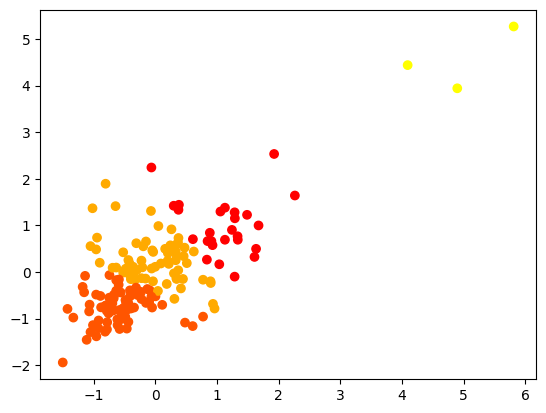

In [86]:
plt.scatter(imp_exp_t[:, 0], imp_exp_t[:, 1], cmap='autumn', c=clusters)

In [87]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(imp_exp_t)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

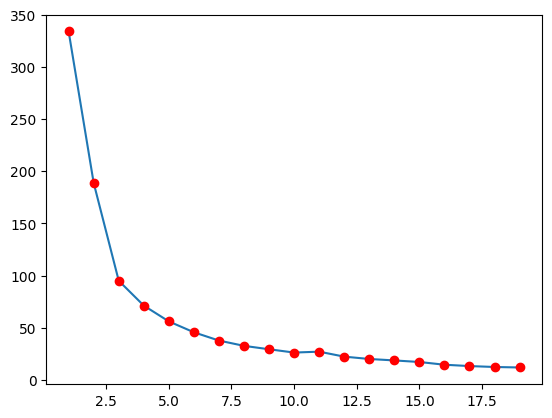

In [82]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Я выбрала сделать 4 кластера, хотя можно было и 3 впринципе

In [93]:
inc_life = countries[['income', 'life_expec']]

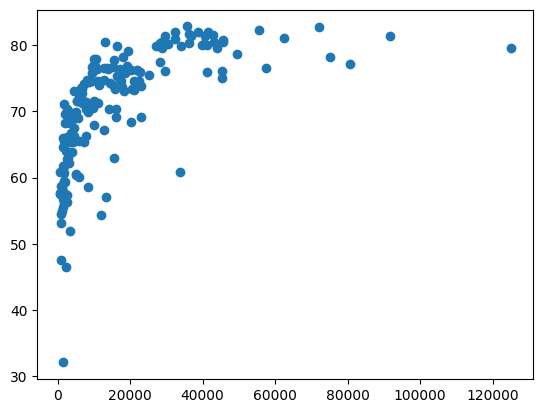

In [94]:
plt.scatter(x=inc_life['income'], y=inc_life['life_expec'])
plt.show()

Любопытненько

In [95]:
inc_life_t = scaler.fit_transform(inc_life)

In [96]:
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(inc_life_t)
clusters

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       3, 1, 1, 1, 1, 0, 0, 1, 0, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 0,
       0, 1, 3, 0, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 3, 1, 2, 1, 0, 0, 1, 1, 0, 3, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       3, 3, 0, 0, 3, 3, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 0, 1, 3, 0, 1, 1,
       0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

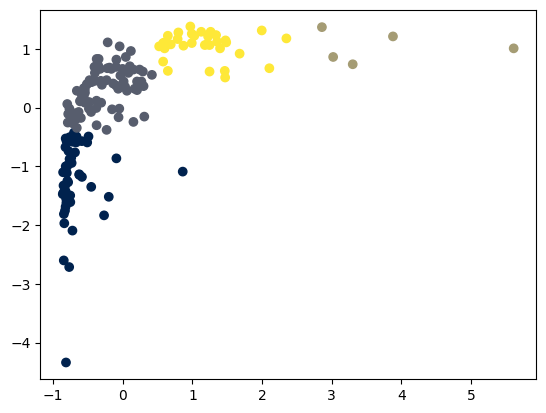

In [102]:
plt.scatter(inc_life_t[:, 0], inc_life_t[:, 1], cmap='cividis', c=clusters)

In [98]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(inc_life_t)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

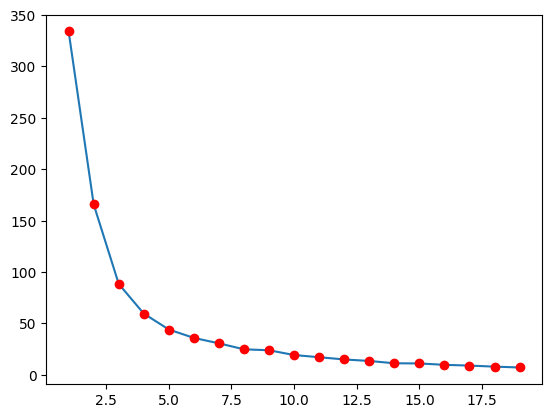

In [99]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')